In [59]:
# Reading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("darkgrid")
df=pd.read_csv(r"C:\Users\hp\OneDrive - subho\Desktop\UNIFIED\Coca Cola Stock - Live and Updated  ( ML _ FA _ DA projects)\Coca-Cola_stock_history.csv")
print(df)
type(df)

                            Date       Open       High        Low      Close  \
0                     1962-01-02   0.050016   0.051378   0.050016   0.050016   
1                     1962-01-03   0.049273   0.049273   0.048159   0.048902   
2                     1962-01-04   0.049026   0.049645   0.049026   0.049273   
3                     1962-01-05   0.049273   0.049892   0.048035   0.048159   
4                     1962-01-08   0.047787   0.047787   0.046735   0.047664   
...                          ...        ...        ...        ...        ...   
15306  2022-10-20 00:00:00-04:00  55.770000  55.919998  54.959999  55.080002   
15307  2022-10-21 00:00:00-04:00  55.000000  56.110001  54.990002  55.959999   
15308  2022-10-24 00:00:00-04:00  56.639999  57.730000  56.570000  57.570000   
15309  2022-10-25 00:00:00-04:00  59.040001  59.110001  57.750000  58.950001   
15310  2022-10-26 00:00:00-04:00  59.009998  59.779999  58.860001  59.389999   

         Volume  Dividends  Stock Split

pandas.core.frame.DataFrame

In [60]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [61]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [62]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
15306,2022-10-20 00:00:00-04:00,55.770000,55.919998,54.959999,55.080002,16905100,0.0,0
15307,2022-10-21 00:00:00-04:00,55.000000,56.110001,54.990002,55.959999,15028000,0.0,0
15308,2022-10-24 00:00:00-04:00,56.639999,57.730000,56.570000,57.570000,17416700,0.0,0
15309,2022-10-25 00:00:00-04:00,59.040001,59.110001,57.750000,58.950001,28829900,0.0,0
15310,2022-10-26 00:00:00-04:00,59.009998,59.779999,58.860001,59.389999,15831400,0.0,0


In [63]:
df.shape

(15311, 8)

In [64]:
df.describe(include='all')

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15311,15311.000000,15311.000000,15311.000000,15311.000000,1.531100e+04,15311.000000,15311.000000
unique,15311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.812883,11.906708,11.717375,11.815409,9.139213e+06,0.001678,0.001110
std,NaN,15.025726,15.133336,14.915580,15.026316,7.957947e+06,0.021302,0.049148
min,NaN,0.037154,0.037279,0.034890,0.037028,7.680000e+04,0.000000,0.000000
25%,NaN,0.238453,0.240305,0.236415,0.238312,2.889600e+06,0.000000,0.000000
50%,NaN,4.935146,4.980985,4.884242,4.937339,7.708800e+06,0.000000,0.000000
75%,NaN,17.383926,17.612844,17.168283,17.415106,1.307130e+07,0.000000,0.000000


In [65]:
df.info

<bound method DataFrame.info of                             Date       Open       High        Low      Close  \
0                     1962-01-02   0.050016   0.051378   0.050016   0.050016   
1                     1962-01-03   0.049273   0.049273   0.048159   0.048902   
2                     1962-01-04   0.049026   0.049645   0.049026   0.049273   
3                     1962-01-05   0.049273   0.049892   0.048035   0.048159   
4                     1962-01-08   0.047787   0.047787   0.046735   0.047664   
...                          ...        ...        ...        ...        ...   
15306  2022-10-20 00:00:00-04:00  55.770000  55.919998  54.959999  55.080002   
15307  2022-10-21 00:00:00-04:00  55.000000  56.110001  54.990002  55.959999   
15308  2022-10-24 00:00:00-04:00  56.639999  57.730000  56.570000  57.570000   
15309  2022-10-25 00:00:00-04:00  59.040001  59.110001  57.750000  58.950001   
15310  2022-10-26 00:00:00-04:00  59.009998  59.779999  58.860001  59.389999   

       

In [66]:
print(df.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [67]:
 df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits      int64
dtype: object

In [68]:
#converting date column to date type

def parse_mixed_date(x):
    try:
        return pd.to_datetime(x, utc=True)
    except:
        try:
            return pd.to_datetime(x, dayfirst=True)
        except:
            return pd.NaT


df['Date'] = df['Date'].apply(parse_mixed_date)

df['Date'] = df['Date'].dt.tz_localize(None)

print(df['Date'].tail())    
print(df['Date'].head())   


15306   2022-10-20 04:00:00
15307   2022-10-21 04:00:00
15308   2022-10-24 04:00:00
15309   2022-10-25 04:00:00
15310   2022-10-26 04:00:00
Name: Date, dtype: datetime64[ns]
0   1962-01-02
1   1962-01-03
2   1962-01-04
3   1962-01-05
4   1962-01-08
Name: Date, dtype: datetime64[ns]


In [69]:
print('Shape before deleting duplicate values:', df.shape)

Shape before deleting duplicate values: (15311, 8)


In [70]:
# Checking duplicates rows and Removing duplicate rows if any
print(df.duplicated().value_counts())
df.drop_duplicates(inplace = True)
print('Shape After deleting duplicate values:', df.shape)

False    15311
Name: count, dtype: int64
Shape After deleting duplicate values: (15311, 8)


In [71]:
# Finging unique values for each column
# To understand which column is categorical and which one is Continuous
df.nunique()

Date            15311
Open            14855
High            14547
Low             14580
Close           11105
Volume          10396
Dividends          64
Stock Splits        3
dtype: int64

In [72]:
# adjusted close

df['adjusted_close']=np.where(df['Stock Splits']== 0,df['Close']-df['Dividends'],
                              (df['Close']-df['Dividends'])/df['Stock Splits'])

In [73]:
df.dtypes

Date              datetime64[ns]
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume                     int64
Dividends                float64
Stock Splits               int64
adjusted_close           float64
dtype: object

In [74]:
#creating new column yer
df['year'] = df['Date'].dt.year

In [75]:
# Create a new column with month names
import calendar
df['month'] = df['Date'].dt.month
df['month_name'] = df['month'].apply(lambda x: calendar.month_name[x])

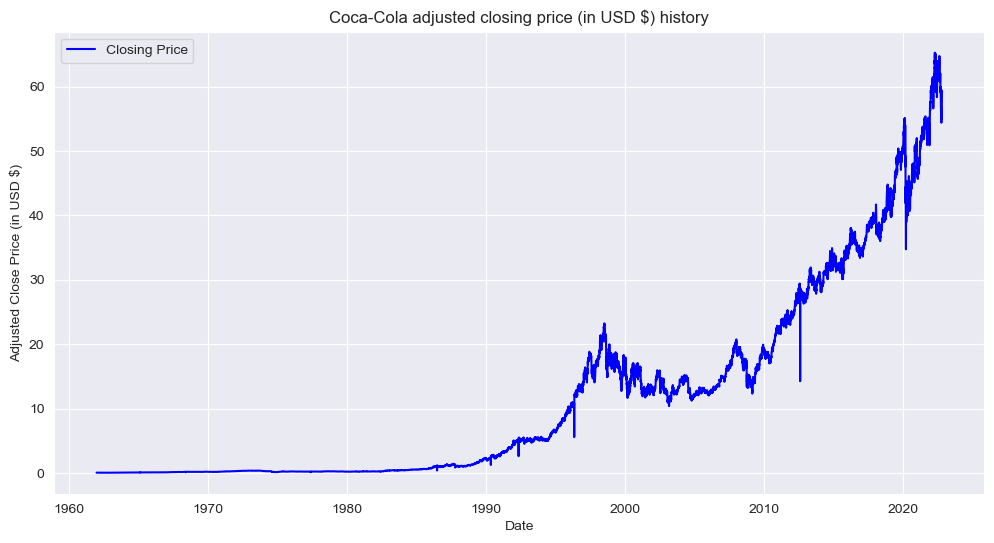

Minimum 5 Observations:
                   Date  adjusted_close
123 1962-06-27 04:00:00        0.037028
122 1962-06-26 04:00:00        0.037154
121 1962-06-25 04:00:00        0.037279
120 1962-06-22 04:00:00        0.037656
205 1962-10-23 04:00:00        0.037671
Maximum 5 Observations:
                     Date  adjusted_close
15182 2022-04-25 04:00:00       64.993156
15179 2022-04-20 04:00:00       65.012871
15197 2022-05-16 04:00:00       65.012871
15185 2022-04-28 04:00:00       65.239563
15180 2022-04-21 04:00:00       65.259270


In [76]:
# Visualizing the adjusted closing price history

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['adjusted_close'], color='blue', label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (in USD $)')
plt.title('Coca-Cola adjusted closing price (in USD $) history')
plt.legend()
plt.grid(True)
plt.show()

# Sort data to easily find min/max adjusted_close values
df_sorted = df.sort_values('adjusted_close')
# Get minimum 5 observations
min_5 = df_sorted[['Date', 'adjusted_close']].head(5)
# Get maximum 5 observations
max_5 = df_sorted[['Date', 'adjusted_close']].tail(5)
# Print minimum 5 observations
print("Minimum 5 Observations:")
print(min_5)
# Print maximum 5 observations
print("Maximum 5 Observations:")
print(max_5)


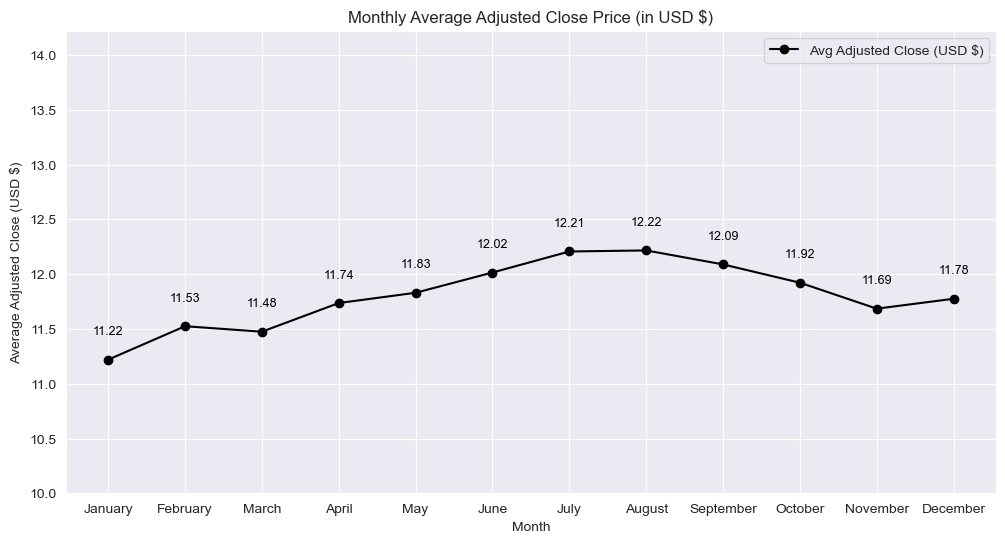

In [77]:
# Visualizing the adjusted closing price history monthly

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Ensure correct ordering of month names
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# Group by month and calculate average adjusted close price
month_name_avg_adjclose = df.groupby('month_name', observed=True)['adjusted_close'].mean().reset_index()
month_name_avg_adjclose = month_name_avg_adjclose.sort_values('month_name')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(month_name_avg_adjclose['month_name'], 
         month_name_avg_adjclose['adjusted_close'], 
         linestyle='-', marker='o', color='black',label='Avg Adjusted Close (USD $)')

# Adjust y-axis limit
y_max = month_name_avg_adjclose['adjusted_close'].max()
plt.ylim(10, y_max + 2)  # Add buffer space on top

# Add data labels on each point
for i, value in enumerate(month_name_avg_adjclose['adjusted_close']):
    plt.text(i, value + 0.2, f"{value:.2f}", ha='center', va='bottom', fontsize=9, color='black')

# Chart formatting
plt.title('Monthly Average Adjusted Close Price (in USD $)')
plt.xlabel('Month')
plt.ylabel('Average Adjusted Close (USD $)')
plt.grid(True)
plt.xticks(rotation=0)
plt.legend()
plt.show()



Regression Equation: Average adjusted close (in USD $) =  0.75 × Year + -1483.37
R-squared: 0.757
P-value: 0.0


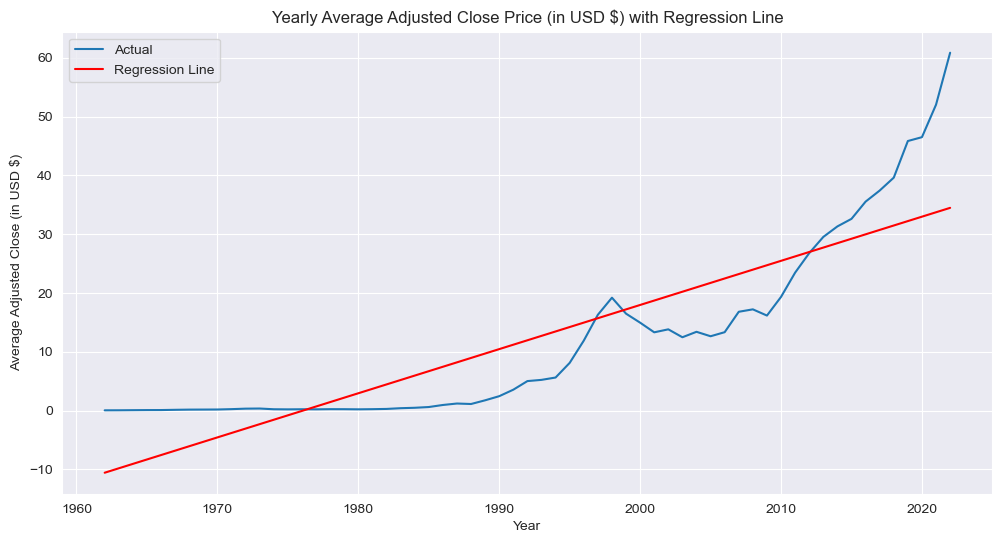

The correlation is strong
The relationship between year and adjusted close is highly significant — the relationship is very unlikely to be due to chance.


In [78]:
#Yearly Average Adjusted Close Price with Regression Line

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and calculate average adjusted close
yearly_avg_adjclose = df.groupby('year', observed=True)['adjusted_close'].mean().reset_index()

# Independent and dependent variables
X = yearly_avg_adjclose['year']
y = yearly_avg_adjclose['adjusted_close']

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_with_const).fit()

# Extract regression coefficients, R-squared, and p-value (using iloc to avoid warning)
intercept = model.params.iloc[0]
slope = model.params.iloc[1]
r_squared = model.rsquared
p_value = model.pvalues.iloc[1]

# Display the regression equation
print("Regression Equation: Average adjusted close (in USD $) = ", round(slope, 2), "× Year +", round(intercept, 2))

# Display R-squared
print("R-squared:", round(r_squared, 3))

# Display p-value
print("P-value:", round(p_value, 3))

# Plot the yearly average adjusted close as a line chart
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_adjclose['year'], yearly_avg_adjclose['adjusted_close'], label='Actual')

# Plot the regression line
regression_line = intercept + slope * yearly_avg_adjclose['year']
plt.plot(yearly_avg_adjclose['year'], regression_line, color='red', label='Regression Line')

# Add labels, grid, legend, and title
plt.title('Yearly Average Adjusted Close Price (in USD $) with Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Adjusted Close (in USD $)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=0)
plt.show()

# Evaluate strength of correlation
if r_squared < 0.5:
    print("The correlation is weak")
elif 0.5 <= r_squared < 0.6:
    print("The correlation is moderate")
else:
    print("The correlation is strong")

# Hypothesis Test for p-value
alpha = 0.05  # Significance level

if p_value < 0.01:
    print("The relationship between year and adjusted close is highly significant — the relationship is very unlikely to be due to chance.")
elif 0.01 <= p_value < 0.05:
    print("The relationship between year and adjusted close is statistically significant — there is sufficient evidence to conclude the relationship is real.")
elif 0.05 <= p_value < 0.1:
    print("The relationship between year and adjusted close is marginally significant — there is weak evidence that the relationship is not due to chance.")
else:
    print("The relationship between year and adjusted close is not statistically significant — the relationship is likely due to random variation.")


In [79]:
# Sort data to easily find max High values

df_sorted = df.sort_values('High')
# Get maximum 5 observations
max_5 = df_sorted[['Date', 'High']].tail(5)
# Print maximum 5 observations
print("Maximum 5 Observations:")
print(max_5)

Maximum 5 Observations:
                     Date       High
15181 2022-04-22 04:00:00  65.387402
15183 2022-04-26 04:00:00  65.416982
15197 2022-05-16 04:00:00  65.426838
15180 2022-04-21 04:00:00  66.037927
15182 2022-04-25 04:00:00  66.235058


In [80]:
# Sort data to easily find min Low values

df_sorted = df.sort_values('Low')
# Get minimum 5 observations
min_5 = df_sorted[['Date', 'Low']].head(5)
# Print minimum 5 observations
print("Minimum 5 Observations:")
print(min_5)

Minimum 5 Observations:
                   Date       Low
103 1962-05-29 04:00:00  0.034890
121 1962-06-25 04:00:00  0.036212
123 1962-06-27 04:00:00  0.036840
122 1962-06-26 04:00:00  0.036903
124 1962-06-28 04:00:00  0.037530


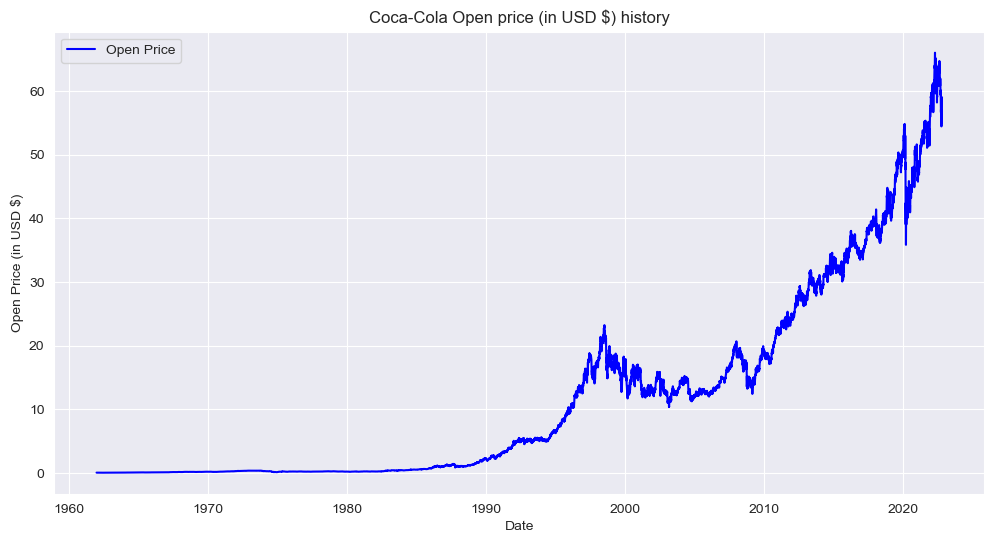

Maximum 5 Observations:
                     Date       Open
15186 2022-04-29 04:00:00  64.924157
15180 2022-04-21 04:00:00  65.032577
15181 2022-04-22 04:00:00  65.131141
15198 2022-05-17 04:00:00  65.150854
15182 2022-04-25 04:00:00  66.037933
Minimum 5 Observations:
                   Date      Open
123 1962-06-27 04:00:00  0.037154
122 1962-06-26 04:00:00  0.037279
124 1962-06-28 04:00:00  0.037530
121 1962-06-25 04:00:00  0.037656
206 1962-10-24 04:00:00  0.037671


In [81]:
# Visualizing the adjusted closing price history

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], color='blue', label='Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price (in USD $)')
plt.title('Coca-Cola Open price (in USD $) history')
plt.legend()
plt.grid(True)
plt.show()

# Sort data to easily find max and min Open values

df_sorted = df.sort_values('Open')

# Get maximum 5 observations
max_5 = df_sorted[['Date', 'Open']].tail(5)

# Print maximum 5 observations
print("Maximum 5 Observations:")
print(max_5)

# Get minimum 5 observations
min_5 = df_sorted[['Date', 'Open']].head(5)

# Print minimum 5 observations
print("Minimum 5 Observations:")
print(min_5)

Regression Equation: Open price (in USD $) =  0.75 × Year + -1483.57
R-squared: 0.757
P-value: 0.0


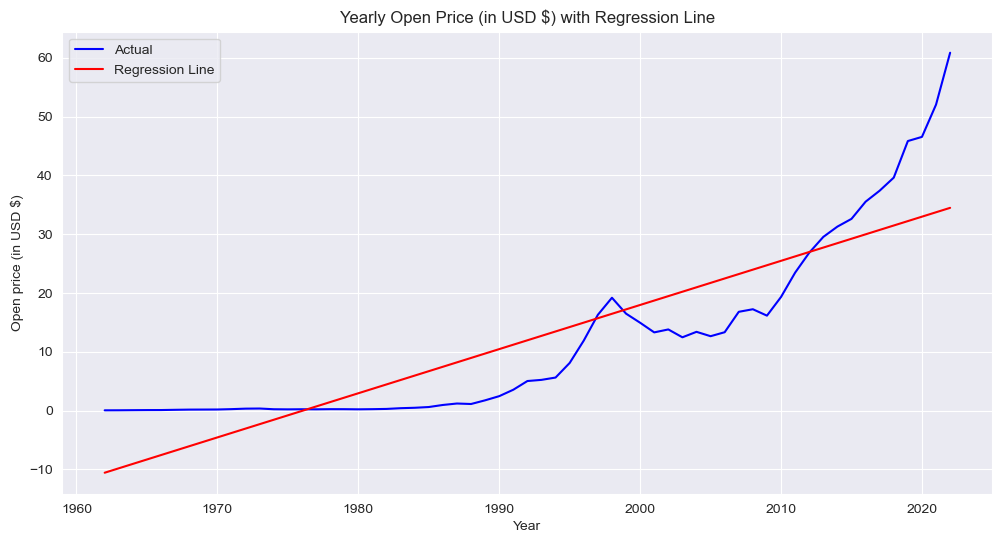

The correlation is strong
The relationship between year and open price is highly significant — the relationship is very unlikely to be due to chance.


In [82]:
#Yearly open Price with Regression Line

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and calculate average open price
Open_avg = df.groupby('year', observed=True)['Open'].mean().reset_index()

# Independent and dependent variables
X = Open_avg['year']
y = Open_avg['Open']

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_with_const).fit()

# Extract regression coefficients, R-squared, and p-value (using iloc to avoid warning)
intercept = model.params.iloc[0]
slope = model.params.iloc[1]
r_squared = model.rsquared
p_value = model.pvalues.iloc[1]

# Display the regression equation
print("Regression Equation: Open price (in USD $) = ", round(slope, 2), "× Year +", round(intercept, 2))

# Display R-squared
print("R-squared:", round(r_squared, 3))

# Display p-value
print("P-value:", round(p_value, 3))

# Plot the yearly average open price as a line chart
plt.figure(figsize=(12, 6))
plt.plot(Open_avg['year'], Open_avg['Open'], label='Actual', color='blue')

# Plot the regression line
regression_line = intercept + slope * Open_avg['year']
plt.plot(Open_avg['year'], regression_line, color='red', label='Regression Line')

# Add labels, grid, legend, and title
plt.title('Yearly Open Price (in USD $) with Regression Line')
plt.xlabel('Year')
plt.ylabel('Open price (in USD $)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=0)
plt.show()

# Evaluate strength of correlation
if r_squared < 0.5:
    print("The correlation is weak")
elif 0.5 <= r_squared < 0.6:
    print("The correlation is moderate")
else:
    print("The correlation is strong")

# Hypothesis Test for p-value
alpha = 0.05  # Significance level

if p_value < 0.01:
    print("The relationship between year and open price is highly significant — the relationship is very unlikely to be due to chance.")
elif 0.01 <= p_value < 0.05:
    print("The relationship between year and open price is statistically significant — there is sufficient evidence to conclude the relationship is real.")
elif 0.05 <= p_value < 0.1:
    print("The relationship between year and open price is marginally significant — there is weak evidence that the relationship is not due to chance.")
else:
    print("The relationship between year and open price is not statistically significant — the relationship is likely due to random variation.")



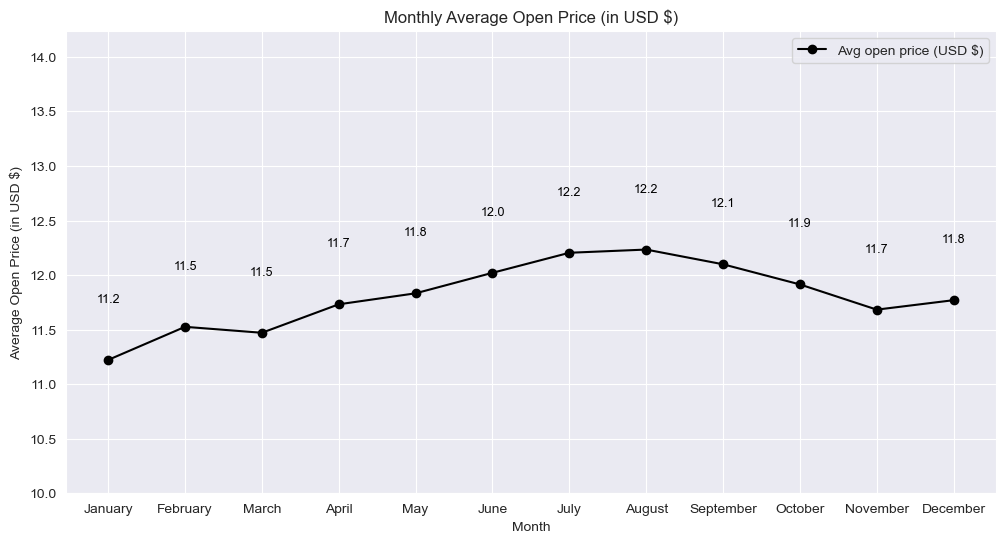

In [83]:
# Visualizing the monthly average Open price

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Ensure 'month_name' column is in the correct order
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# Group by month and calculate average Open price
month_name_avg_Open = df.groupby('month_name', observed=True)['Open'].mean().reset_index()
month_name_avg_Open = month_name_avg_Open.sort_values('month_name')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(month_name_avg_Open['month_name'], month_name_avg_Open['Open'], linestyle='-', marker='o', color = 'black',label='Avg open price (USD $)')


# Adjust y-axis limit
y_max = month_name_avg_Open['Open'].max()
plt.ylim(10, y_max + 2)  # Add space for labels

# Add data labels on each point (slightly above points)
for i, value in enumerate(month_name_avg_Open['Open']):
    plt.text(i, value + 0.5, f"{value:.1f}", ha='center', va='bottom', fontsize=9, color='black')


plt.title('Monthly Average Open Price (in USD $)')
plt.xlabel('Month')
plt.ylabel('Average Open Price (in USD $)')
plt.grid(True)
plt.xticks(rotation=0)
plt.legend()
plt.show()


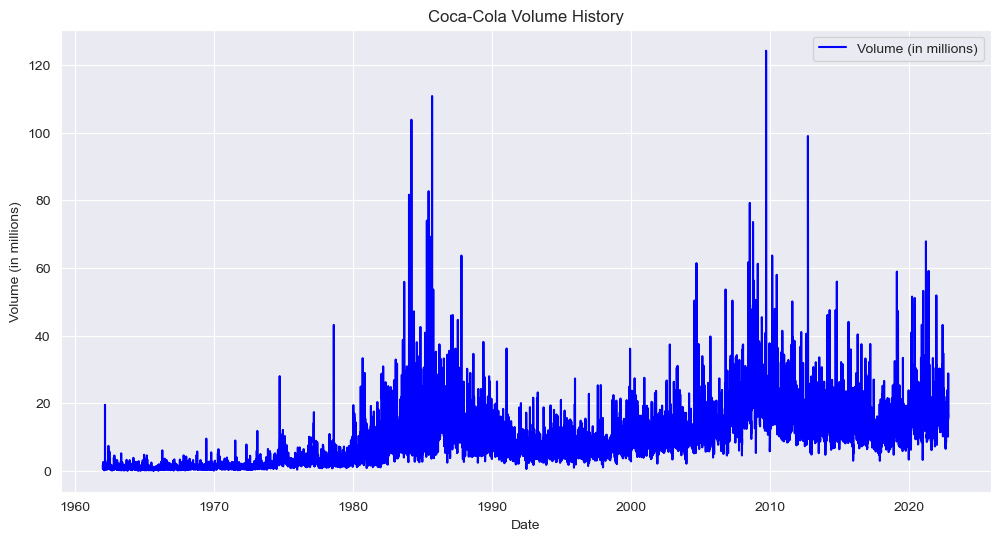

Maximum 5 Observations (Volume in millions):
                     Date    Volume
5888  1985-06-10 04:00:00   82.6560
12770 2012-09-21 04:00:00   98.9675
5576  1984-03-15 00:00:00  103.7760
5951  1985-09-09 04:00:00  110.7840
12011 2009-09-18 04:00:00  124.1690
Minimum 5 Observations (Volume in millions):
                    Date  Volume
1007 1965-12-31 00:00:00  0.0768
452  1963-10-16 04:00:00  0.0768
1983 1969-12-26 00:00:00  0.1056
169  1962-08-31 04:00:00  0.1152
1285 1967-02-07 00:00:00  0.1152


In [84]:
# Visualizing the Volume history

# Convert Volume to millions
df['Volume_million'] = df['Volume'] / 1000000
# Plotting the Volume history
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume_million'], color='blue', label='Volume (in millions)')
plt.xlabel('Date')
plt.ylabel('Volume (in millions)')
plt.title('Coca-Cola Volume History')
plt.legend()
plt.grid(True)
plt.show()

# Sort data by Volume to find extremes
df_sorted = df.sort_values('Volume')

# Maximum 5 observations (in millions)
max_5 = df_sorted[['Date', 'Volume']].tail(5).copy()
max_5['Volume'] = max_5['Volume'] / 1000000
print("Maximum 5 Observations (Volume in millions):")
print(max_5)

# Minimum 5 observations (in millions)
min_5 = df_sorted[['Date', 'Volume']].head(5).copy()
min_5['Volume'] = min_5['Volume'] / 1000000
print("Minimum 5 Observations (Volume in millions):")
print(min_5)


Regression Equation: Volume (in millions) =  0.28 × Year + -556.31
R-squared: 0.658
P-value: 0.0


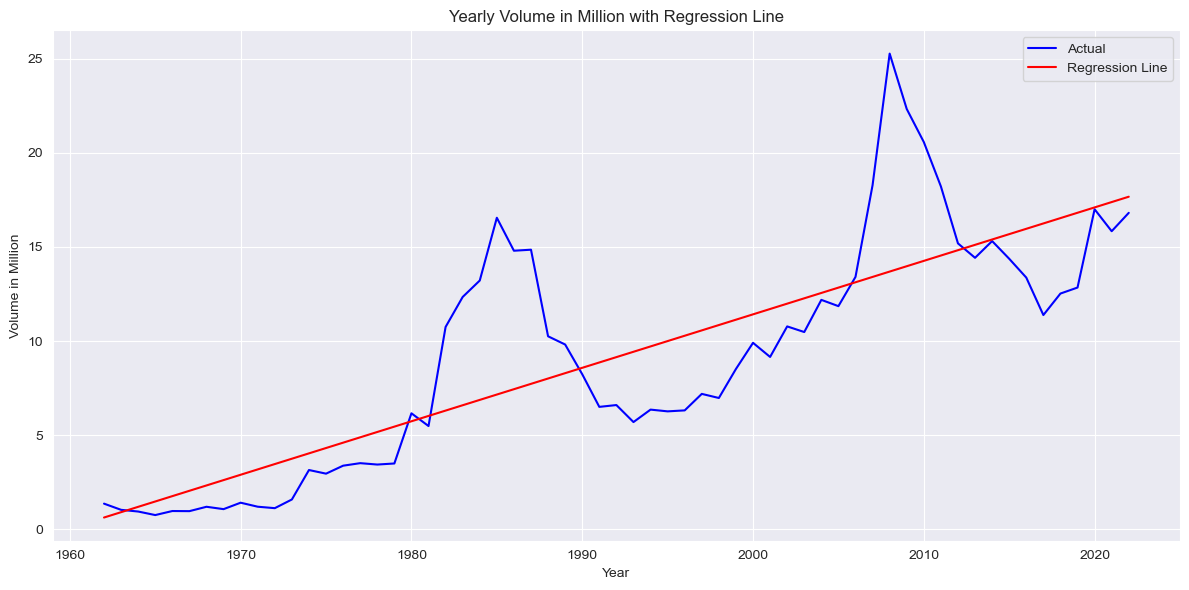

The correlation is strong
The relationship between year and volume is highly significant — the relationship is very unlikely to be due to chance.


In [85]:
#Yearly volumn in millions with regression Line

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Volume to millions
df['Volume_million'] = df['Volume'] / 1000000

# Group by year and calculate average volume in millions
Volume_million_avg = df.groupby('year', observed=True)['Volume_million'].mean().reset_index()

# Independent and dependent variables
X = Volume_million_avg['year']
y = Volume_million_avg['Volume_million']

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_with_const).fit()

# Extract regression coefficients, R-squared, and p-value
intercept = model.params.iloc[0]
slope = model.params.iloc[1]
r_squared = model.rsquared
p_value = model.pvalues.iloc[1]

# Display the regression equation
print("Regression Equation: Volume (in millions) = ", round(slope, 2), "× Year +", round(intercept, 2))

# Display R-squared
print("R-squared:", round(r_squared, 3))

# Display p-value
print("P-value:", round(p_value, 3))

# Plot the yearly average volume in millions as a line chart
plt.figure(figsize=(12, 6))
plt.plot(Volume_million_avg['year'], Volume_million_avg['Volume_million'], label='Actual', color='blue')

# Plot the regression line
regression_line = intercept + slope * Volume_million_avg['year']
plt.plot(Volume_million_avg['year'], regression_line, color='red', label='Regression Line')

# Add labels, grid, legend, and title
plt.title('Yearly Volume in Million with Regression Line')
plt.xlabel('Year')
plt.ylabel('Volume in Million')
plt.grid(True)
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Evaluate strength of correlation
if r_squared < 0.5:
    print("The correlation is weak")
elif 0.5 <= r_squared < 0.6:
    print("The correlation is moderate")
else:
    print("The correlation is strong")

# Hypothesis Test for p-value
alpha = 0.05  # Significance level

if p_value < 0.01:
    print("The relationship between year and volume is highly significant — the relationship is very unlikely to be due to chance.")
elif 0.01 <= p_value < 0.05:
    print("The relationship between year and volume is statistically significant — there is sufficient evidence to conclude the relationship is real.")
elif 0.05 <= p_value < 0.1:
    print("The relationship between year and volume is marginally significant — there is weak evidence that the relationship is not due to chance.")
else:
    print("The relationship between year and volume is not statistically significant — the relationship is likely due to random variation.")


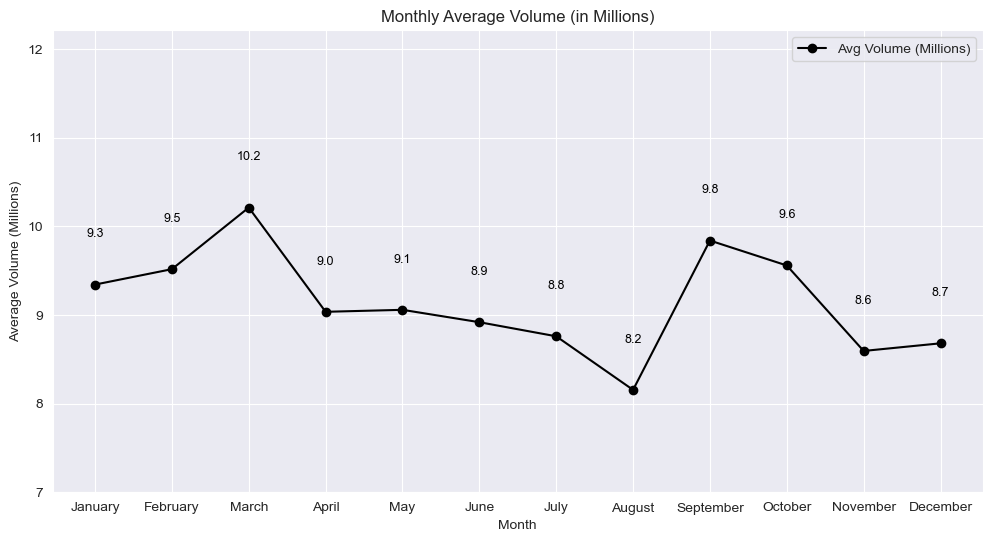

In [86]:
# Visualizing the monthly average Volume in million

# Convert Volume to millions
df['Volume_million'] = df['Volume'] / 1000000

# Month order for plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Ensure 'month_name' column is in correct order
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# Group by month and calculate average Volume in millions
month_name_avg_Volume_million = df.groupby('month_name', observed=True)['Volume_million'].mean().reset_index()
month_name_avg_Volume_million = month_name_avg_Volume_million.sort_values('month_name')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(month_name_avg_Volume_million['month_name'], 
         month_name_avg_Volume_million['Volume_million'], 
         linestyle='-', marker='o', color='black', label='Avg Volume (Millions)')

# Adjust y-axis limit
y_max = month_name_avg_Volume_million['Volume_million'].max()
plt.ylim(7, y_max + 2)

# Add data labels above points
for i, value in enumerate(month_name_avg_Volume_million['Volume_million']):
    plt.text(i, value + 0.5, f"{value:.1f}", ha='center', va='bottom', fontsize=9, color='black')

# Chart formatting
plt.title('Monthly Average Volume (in Millions)')
plt.xlabel('Month')
plt.ylabel('Average Volume (Millions)')
plt.grid(True)
plt.xticks(rotation=0)
plt.legend()
plt.show()


RMSE: 18.04891594365153
MSE: 325.7633667409984
R²: -1.817661512749234


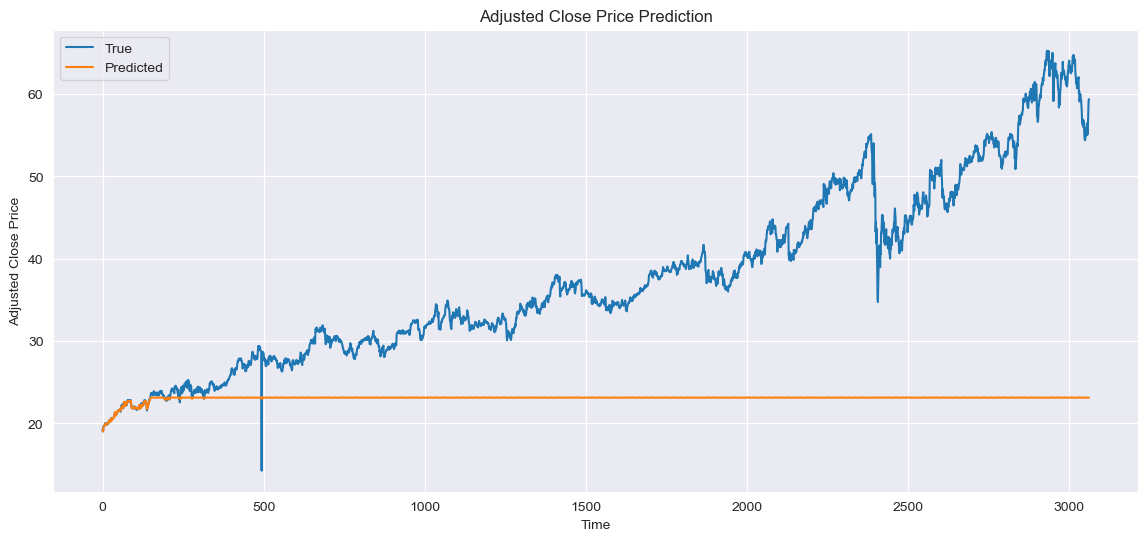

In [29]:
#REGRESSION MODEl RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Extract date parts as new features
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday  # 0=Monday, 6=Sunday

# Create lag features
df['adjusted_close_t-1'] = df['adjusted_close'].shift(1)
df['adjusted_close_t-2'] = df['adjusted_close'].shift(2)

# Convert month_name to numbers
df['month_encoded'] = LabelEncoder().fit_transform(df['month_name'])

# Define features and target
X = df[['Open', 'High', 'Low', 'Volume', 'month_encoded', 'day', 'weekday', 'adjusted_close_t-1', 'adjusted_close_t-2']]
y = df['adjusted_close']

# Train-test split (ensure data is ordered by Date)
df = df.sort_values('Date')
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Model training
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Prediction and Evaluation
predictions = model.predict(X_test)

# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("RMSE:", rmse)
print("MSE:", mse)
print("R²:", r2)

# Plot predictions vs true values
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='True')
plt.plot(predictions, label='Predicted')
plt.title('Adjusted Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

Epoch 1/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0030
Epoch 2/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.9708e-04
Epoch 3/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.2466e-04
Epoch 4/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.8309e-05
Epoch 5/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7.9736e-05
Epoch 6/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.6052e-05
Epoch 7/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.8392e-05
Epoch 8/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.3799e-05
Epoch 9/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.3958e-05
Epoch 10/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.6379e-05
Epoch 11/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.4806e-05
Epoch 12/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.2569e-05
Epoch 13/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.5367e-05
Epoch 14/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 5.1805e-05
Epoc

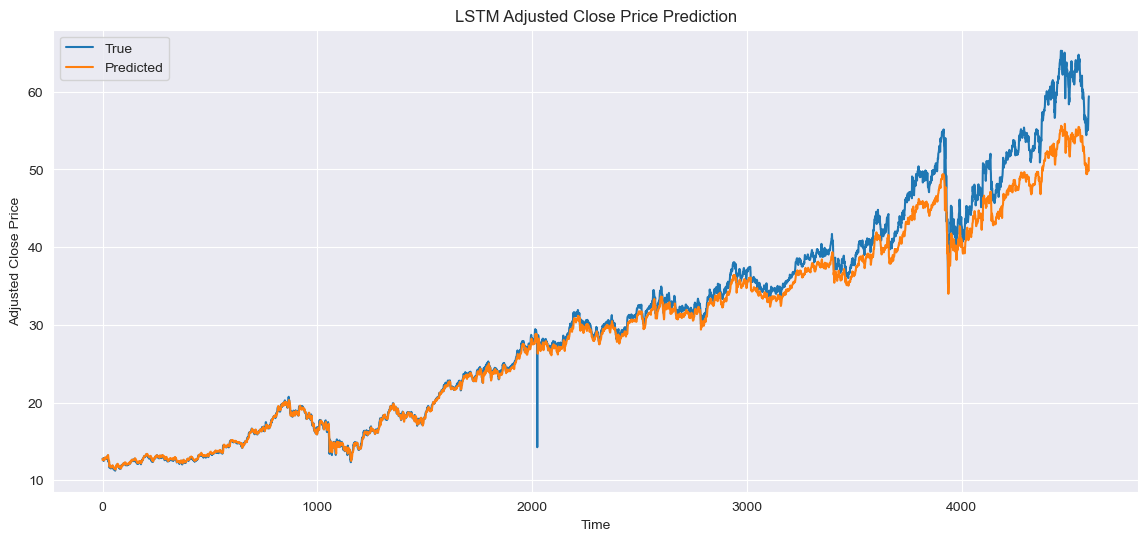

In [30]:
#REGRESSION MODEL LSTM MODEL

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input

# Feature Engineering
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday
df['adjusted_close_t-1'] = df['adjusted_close'].shift(1)
df['adjusted_close_t-2'] = df['adjusted_close'].shift(2)
df['month_encoded'] = LabelEncoder().fit_transform(df['month_name'])

# Drop NA values from lag features
df.dropna(inplace=True)

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'month_encoded', 'day', 'weekday',
            'adjusted_close_t-1', 'adjusted_close_t-2']
X = df[features].values
y = df['adjusted_close'].values

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Reshape for LSTM (samples, timesteps, features)
X_lstm = []
y_lstm = []
lookback = 1
for i in range(lookback, len(X_scaled)):
    X_lstm.append(X_scaled[i-lookback:i])
    y_lstm.append(y_scaled[i])

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)

# Train-test split
train_size = int(len(X_lstm) * 0.7)
X_train, X_test = X_lstm[:train_size], X_lstm[train_size:]
y_train, y_test = y_lstm[:train_size], y_lstm[train_size:]

# Build LSTM Model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  
    LSTM(50, return_sequences=False),                  
    Dropout(0.2),
    Dense(1)])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predictions
predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
r2 = r2_score(y_test_rescaled, predictions_rescaled)

print("RMSE:", rmse)
print("MSE:", mse)
print("R²:", r2)

# Plot results
plt.figure(figsize=(14,6))
plt.plot(y_test_rescaled, label='True')
plt.plot(predictions_rescaled, label='Predicted')
plt.title('LSTM Adjusted Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


RMSE: 28.362361617297502
MSE: 804.4235565103505
R²: -5.962173033226879


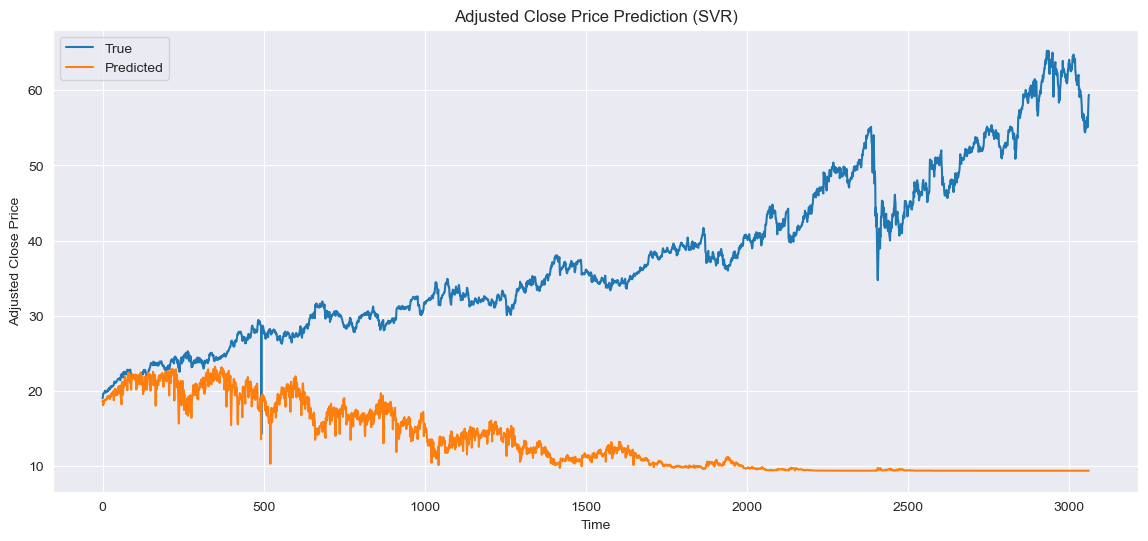

In [31]:
#REGRESSION MODEL SVR MODEL

# Extract date parts as new features
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday  # 0=Monday, 6=Sunday

# Create lag features
df['adjusted_close_t-1'] = df['adjusted_close'].shift(1)
df['adjusted_close_t-2'] = df['adjusted_close'].shift(2)

# Convert month_name to numbers
df['month_encoded'] = LabelEncoder().fit_transform(df['month_name'])

# Drop NA values (due to lag features)
df.dropna(inplace=True)

# Define features and target
X = df[['Open', 'High', 'Low', 'Volume', 'month_encoded', 'day', 'weekday', 'adjusted_close_t-1', 'adjusted_close_t-2']]
y = df['adjusted_close']

# Train-test split (ensure data is ordered by Date)
df = df.sort_values('Date')
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Scale the features (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Model training with SVR
model = SVR(kernel='rbf', C=100, epsilon=0.1)
model.fit(X_train_scaled, y_train_scaled)

# Prediction and inverse scaling
predictions_scaled = model.predict(X_test_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1)).ravel()

# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("RMSE:", rmse)
print("MSE:", mse)
print("R²:", r2)

# Plot predictions vs true values
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='True')
plt.plot(predictions, label='Predicted')
plt.title('Adjusted Close Price Prediction (SVR)')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

RMSE: 0.42948414486526415
MSE: 0.18445663069064722
R²: 0.9984025109518025


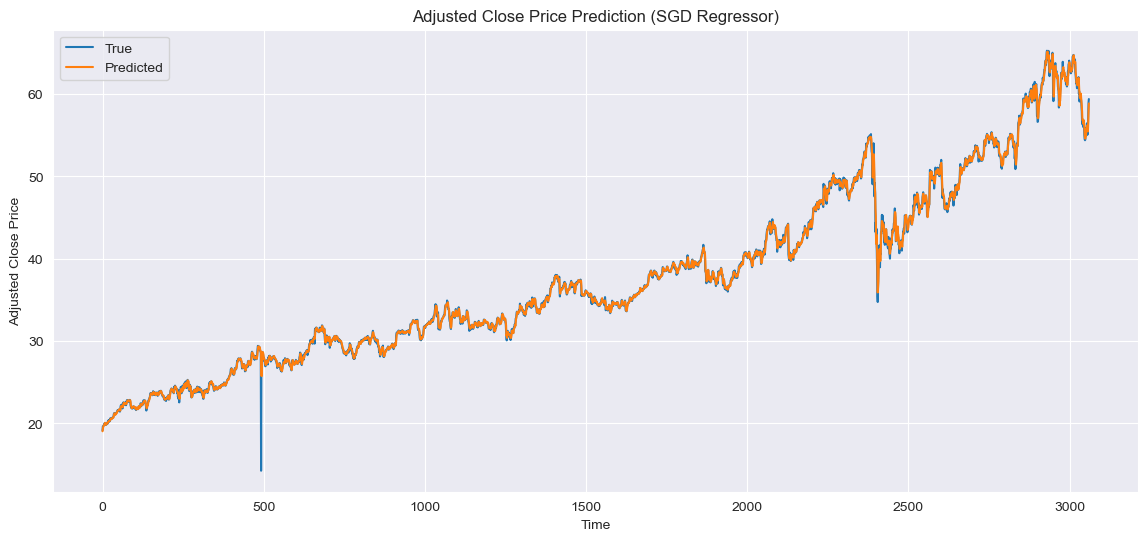

In [32]:
#REGRESSION MODEL SGD MODEL

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Feature Engineering
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday
df['adjusted_close_t-1'] = df['adjusted_close'].shift(1)
df['adjusted_close_t-2'] = df['adjusted_close'].shift(2)
df['month_encoded'] = LabelEncoder().fit_transform(df['month_name'])

# Drop missing values caused by lag features
df.dropna(inplace=True)

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'month_encoded', 'day', 'weekday',
            'adjusted_close_t-1', 'adjusted_close_t-2']
X = df[features]
y = df['adjusted_close']

# Scale features for SGD
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Time-aware train-test split
df = df.sort_values('Date')
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, shuffle=False, test_size=0.2)

# Train the SGD Regressor
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# Prediction
predictions = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("RMSE:", rmse)
print("MSE:", mse)
print("R²:", r2)

# Plot results
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='True')
plt.plot(predictions, label='Predicted')
plt.title('Adjusted Close Price Prediction (SGD Regressor)')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

    
    

In [33]:
print("COMPARING REGRESSION MODEL")

print("\nRANDOM FOREST REGRESSION MODEL")
print("RMSE:", 18.049849630316096)
print("MSE:", 325.79707167702213)
print("R²:", -1.8179530406210564)

print("\nLSTM REGRESSION MODEL")
print("RMSE:", 2.8580138301263966)
print("MSE:", 8.168243053193756)
print("R²:", 0.9569266140815749)

print("\nSVR REGRESSION MODEL")
print("RMSE:", 28.362361617297502)
print("MSE:", 804.4235565103505)
print("R²:", -5.962173033226879)

print("\nSGD REGRESSION MODEL")
print("RMSE:", 0.42948414486526415)
print("MSE:", 0.18445663069064722)
print("R²:", 0.9984025109518025)


COMPARING REGRESSION MODEL

RANDOM FOREST REGRESSION MODEL
RMSE: 18.049849630316096
MSE: 325.79707167702213
R²: -1.8179530406210564

LSTM REGRESSION MODEL
RMSE: 2.8580138301263966
MSE: 8.168243053193756
R²: 0.9569266140815749

SVR REGRESSION MODEL
RMSE: 28.362361617297502
MSE: 804.4235565103505
R²: -5.962173033226879

SGD REGRESSION MODEL
RMSE: 0.42948414486526415
MSE: 0.18445663069064722
R²: 0.9984025109518025


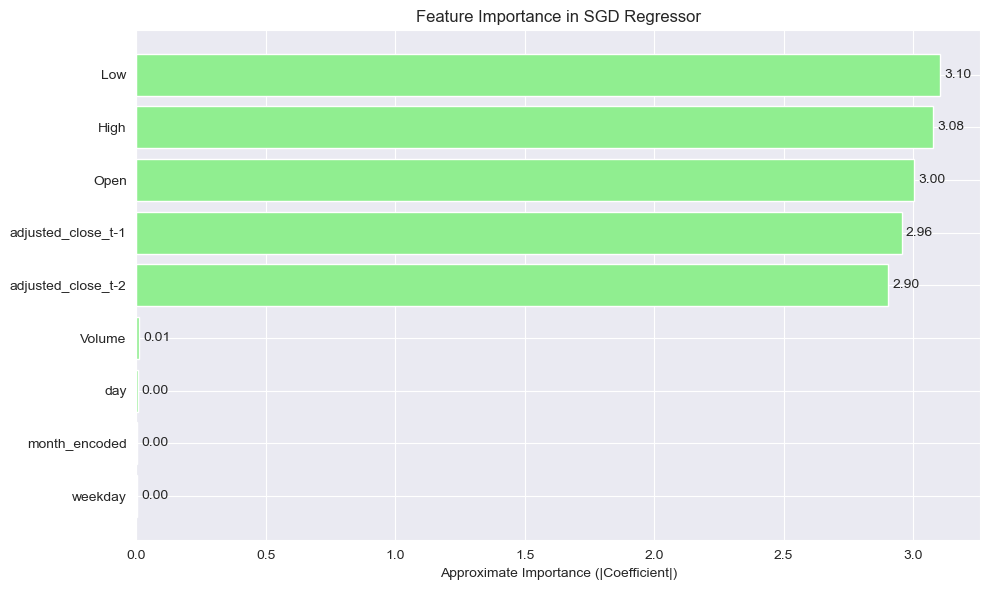

In [34]:
#FEATURE IMPORTANCE IN SGD REGRESSOR

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df[['Open', 'High', 'Low', 'Volume', 'month_encoded', 'day', 'weekday',
        'adjusted_close_t-1', 'adjusted_close_t-2']]
y = df['adjusted_close']

# Scale features (required for SGD)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the SGD model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_scaled, y)

# Approximate feature importance using absolute value of coefficients
features = X.columns
importances = abs(sgd_model.coef_)

# Create DataFrame and plot
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=True, inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='lightgreen')
ax.bar_label(bars, label_type='edge', padding=3, fontsize=10, fmt='%.2f')
ax.set_xlabel("Approximate Importance (|Coefficient|)")
ax.set_title("Feature Importance in SGD Regressor")
plt.tight_layout()
plt.show()


In [35]:
#CLASSIFICATION MODEL RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import numpy as np

# Define custom function for price direction (2 conditions: Up and Down)
def get_price_direction(curr, prev):
    if curr > prev:
        return 1  # Up
    else:
        return 0  # Down

# Extract date parts
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday

# Lag features
df['adjusted_close_t-1'] = df['adjusted_close'].shift(1)
df['adjusted_close_t-2'] = df['adjusted_close'].shift(2)

# Encode month name
df['month_encoded'] = LabelEncoder().fit_transform(df['month_name'])

# Apply price direction function
df['Price_Direction'] = df.apply(lambda row: get_price_direction(row['adjusted_close'], row['adjusted_close_t-1']), axis=1)

# Remove NaN rows from lag features
df.dropna(inplace=True)

# Define features and target
X = df[['Open', 'High', 'Low', 'Volume', 'month_encoded', 'day', 'weekday',
        'adjusted_close_t-1', 'adjusted_close_t-2']]
y = df['Price_Direction']

# Sort by date and split
df = df.sort_values('Date')
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Calculate class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)

# Train classifier with class weights
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: class_weights[0], 1: class_weights[1]})
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0)) 



Accuracy: 0.4786017641293695

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.98      0.64      1451
           1       0.58      0.03      0.06      1610

    accuracy                           0.48      3061
   macro avg       0.53      0.50      0.35      3061
weighted avg       0.53      0.48      0.33      3061



In [36]:
#CLASSIFICATION MODEL LSTM
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import accuracy_score, classification_report

# Feature Engineering
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday
df['adjusted_close_t-1'] = df['adjusted_close'].shift(1)
df['adjusted_close_t-2'] = df['adjusted_close'].shift(2)
df['month_encoded'] = LabelEncoder().fit_transform(df['month_name'])

# Define price direction as 2 classes: Up (1) or Down (0)
def get_price_direction(curr, prev):
    if curr > prev:
        return 1  # Up
    else:
        return 0  # Down

df['Price_Direction'] = df.apply(lambda row: get_price_direction(row['adjusted_close'], row['adjusted_close_t-1']), axis=1)

# Drop NA values from lag features
df.dropna(inplace=True)

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'month_encoded', 'day', 'weekday',
            'adjusted_close_t-1', 'adjusted_close_t-2']
X = df[features].values
y = df['Price_Direction'].values  # Target is 'Price_Direction'

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling data for LSTM
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Reshape data for LSTM (samples, timesteps, features)
lookback = 1
X_lstm = []
y_lstm = []

for i in range(lookback, len(X_scaled)):
    X_lstm.append(X_scaled[i-lookback:i])
    y_lstm.append(y_scaled[i])

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)

# Train-test split for LSTM
train_size = int(len(X_lstm) * 0.7)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# Build LSTM Model
lstm_model = Sequential([
    Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification (Up or Down)
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM model
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1)

# Predict and evaluate using LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm_classes = (y_pred_lstm > 0.5).astype(int)

# Evaluate LSTM performance
lstm_accuracy = accuracy_score(y_test_lstm, y_pred_lstm_classes)
print("\nLSTM Accuracy:", lstm_accuracy)
print("\nLSTM Classification Report:")
print(classification_report(y_test_lstm, y_pred_lstm_classes))



Epoch 1/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5197 - loss: 0.6922
Epoch 2/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5249 - loss: 0.6918
Epoch 3/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5269 - loss: 0.6911
Epoch 4/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5251 - loss: 0.6918
Epoch 5/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5172 - loss: 0.6916
Epoch 6/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5246 - loss: 0.6918
Epoch 7/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5251 - loss: 0.6910
Epoch 8/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5179 - loss: 0.6921
Epoch 9/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5231 - loss: 0.6922
Epoch 10/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5212 - loss: 0.6919
Epoch 11/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5161 - loss: 0.6921
Epoch 12/50
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [37]:
#CLASSIFICATION MODEL SVC

from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Define custom function for price direction (2 conditions: Up and Down)
def get_price_direction(curr, prev):
    if curr > prev:
        return 1  # Up
    else:
        return 0  # Down

# Extract date parts as new features
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday  # 0=Monday, 6=Sunday

# Create lag features
df['adjusted_close_t-1'] = df['adjusted_close'].shift(1)
df['adjusted_close_t-2'] = df['adjusted_close'].shift(2)

# Convert month_name to numbers
df['month_encoded'] = LabelEncoder().fit_transform(df['month_name'])

# Apply price direction function (classification target)
df['Price_Direction'] = df.apply(lambda row: get_price_direction(row['adjusted_close'], row['adjusted_close_t-1']), axis=1)

# Drop NA values (due to lag features)
df.dropna(inplace=True)

# Define features and target
X = df[['Open', 'High', 'Low', 'Volume', 'month_encoded', 'day', 'weekday', 'adjusted_close_t-1', 'adjusted_close_t-2']]
y = df['Price_Direction']  # Class label for up/down price movement

# Train-test split (ensure data is ordered by Date)
df = df.sort_values('Date')
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Scale the features (important for SVC)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Model training with Support Vector Classifier (SVC) for classification
svc_model = SVC(kernel='rbf', C=100, gamma='scale')  # You can tune C and gamma as needed
svc_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svc_model.predict(X_test_scaled)

# Metrics calculation
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.4996732026143791

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.98      0.65      1451
           1       0.79      0.07      0.12      1609

    accuracy                           0.50      3060
   macro avg       0.64      0.52      0.39      3060
weighted avg       0.64      0.50      0.37      3060



In [38]:
#CLASSIFICATION MODEL SGD MODEL

from sklearn.linear_model import SGDClassifier  # Use SGDClassifier for classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define custom function for price direction (2 conditions: Up and Down)
def get_price_direction(curr, prev):
    if curr > prev:
        return 1  # Up
    else:
        return 0  # Down

# Feature Engineering
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday
df['adjusted_close_t-1'] = df['adjusted_close'].shift(1)
df['adjusted_close_t-2'] = df['adjusted_close'].shift(2)
df['month_encoded'] = LabelEncoder().fit_transform(df['month_name'])

# Apply price direction function for classification target
df['Price_Direction'] = df.apply(lambda row: get_price_direction(row['adjusted_close'], row['adjusted_close_t-1']), axis=1)

# Drop missing values caused by lag features
df.dropna(inplace=True)

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'month_encoded', 'day', 'weekday',
            'adjusted_close_t-1', 'adjusted_close_t-2']
X = df[features]
y = df['Price_Direction']  # Target is the direction: Up (1) or Down (0)

# Scale features for SGD
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Time-aware train-test split
df = df.sort_values('Date')
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, shuffle=False, test_size=0.2)

# Train the SGD Classifier (classification version)
model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)  # 'log_loss' for logistic regression
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.6294117647058823

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.25      0.39      1451
           1       0.59      0.97      0.73      1609

    accuracy                           0.63      3060
   macro avg       0.74      0.61      0.56      3060
weighted avg       0.73      0.63      0.57      3060



In [39]:
#TIME SERIES(ARIMA MODEL)
df.set_index('Date', inplace=True)
# Monthly data
monthly_data = df['adjusted_close'].resample('M').mean()

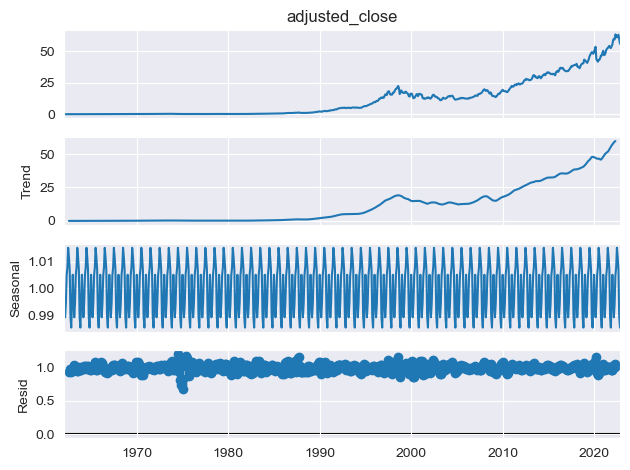

In [40]:
# Decompose
decomposition = seasonal_decompose(monthly_data, model='multiplicative')
fig = decomposition.plot()
plt.show()

In [41]:
# Train-test split
train, test = monthly_data[:int(0.8 * len(monthly_data))], monthly_data[int(0.8 * len(monthly_data)):]
train = pd.DataFrame(train)
test = pd.DataFrame(test)

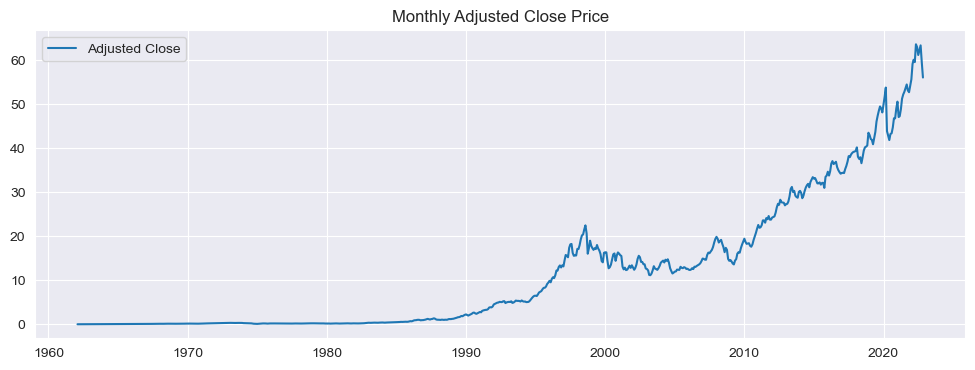

In [42]:
# Plot full series
plt.figure(figsize=(12, 4))
plt.plot(monthly_data, label='Adjusted Close')
plt.legend(loc='best')
plt.title('Monthly Adjusted Close Price')
plt.show()



In [43]:
# ADF Test
adf_test = adfuller(monthly_data)
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical Values @ 0.05:', adf_test[4]['5%'])


ADF Statistic: 3.757536697354424
p-value: 1.0
Critical Values @ 0.05: -2.8655794463678346


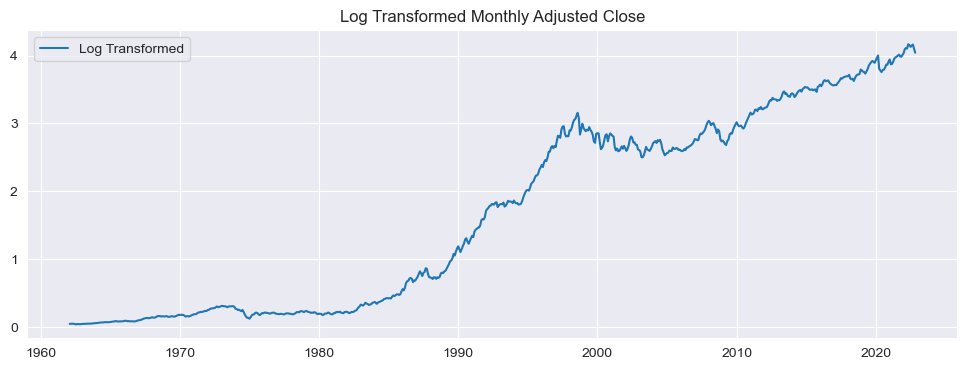

In [44]:
# Log transform
data_log = np.log1p(monthly_data)

plt.figure(figsize=(12, 4))
plt.plot(data_log, label='Log Transformed')
plt.legend(loc='best')
plt.title('Log Transformed Monthly Adjusted Close')
plt.show()


In [45]:
# Differencing
data_log_diff = data_log - data_log.shift()
data_log_diff.dropna(inplace=True)

In [46]:
# ADF & KPSS tests
adf_test = adfuller(data_log_diff)
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical Values @ 0.05:', adf_test[4]['5%'])

kpss_test = kpss(data_log_diff)
print('KPSS Statistic:', kpss_test[0])
print('p-value:', kpss_test[1])
print('Critical Values @ 0.05:', kpss_test[3]['5%'])

ADF Statistic: -5.051922158655367
p-value: 1.7499622270575823e-05
Critical Values @ 0.05: -2.865613606467485
KPSS Statistic: 0.33645892111801795
p-value: 0.1
Critical Values @ 0.05: 0.463


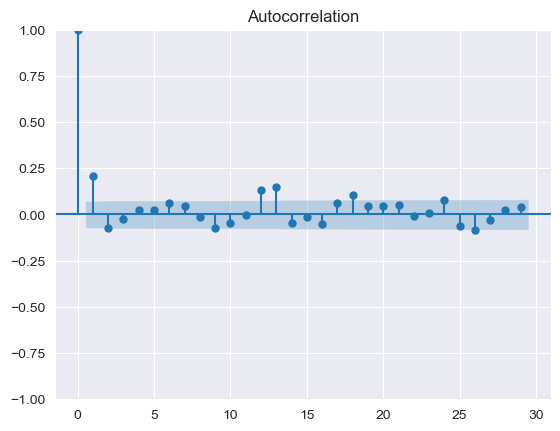

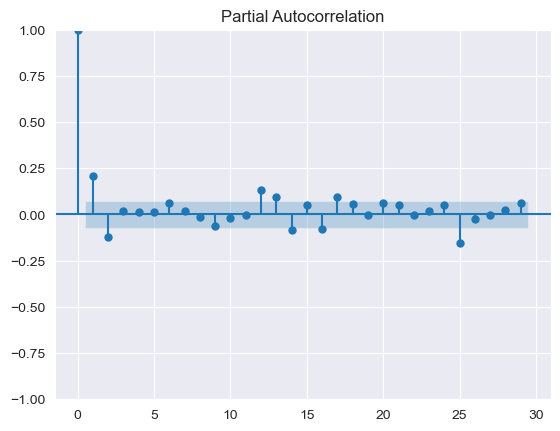

In [47]:
# ACF & PACF
plot_acf(data_log_diff)
plt.show()

plot_pacf(data_log_diff)
plt.show()

In [48]:
# ARIMA Model
model = ARIMA(data_log_diff, order=(12, 1, 4))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         adjusted_close   No. Observations:                  729
Model:                ARIMA(12, 1, 4)   Log Likelihood                1496.821
Date:                Fri, 25 Apr 2025   AIC                          -2959.642
Time:                        12:26:45   BIC                          -2881.607
Sample:                    02-28-1962   HQIC                         -2929.532
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8434      0.451     -1.869      0.062      -1.728       0.041
ar.L2         -0.6880      0.193     -3.569      0.000      -1.066      -0.310
ar.L3         -0.3615      0.313     -1.157      0.247      -0.974       0.251
ar.L4         -0.0519      0.072     -0.723      0.470      -0.193       0.089
ar.L5         -0.0739      0.062     -1.189      0.234      -0.196       0.048
ar.L6         -0.0014      0.053     -0.027      0.979      -0.106       0.103
ar.L7         -0.0152      0.057     -0.264      0.792      -0.128       0.097
ar.L8         -0.0518      0.052     -1.001      0.317      -0.153       0.050
ar.L9         -0.1515      0.051     -2.991      0.003      -0.251      -0.052
ar.L10        -0.2091      0.060     -3.513      0.000      -0.326      -0.092
ar.L11        -0.2236      0.051     -4.390      0.000      -0.323      -0.124
ar.L12        -0.1309      0.050     -2.620      0.009      -0.229      -0.033
ma.L1          0.0812      0.456      0.178      0.859      -0.813       0.976
ma.L2         -0.2563      0.349     -0.735      0.462      -0.939       0.427
ma.L3         -0.3664      0.234     -1.566      0.117      -0.825       0.092
ma.L4         -0.3220      0.285     -1.131      0.258      -0.880       0.236
sigma2         0.0010   3.07e-05     31.400      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2374.33
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              14.72   Skew:                            -1.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
# Forecast reconstruction for test
y_hat_ar = data_log_diff.copy()
y_hat_ar['ar_forecast_log_diff'] = model_fit.predict(start=data_log_diff.index.min(), end=data_log_diff.index.max())



In [50]:
# Recover the log prices
y_hat_ar['ar_forecast_log'] = y_hat_ar['ar_forecast_log_diff'].cumsum() + data_log[0]



In [51]:
# Convert log prices back to original scale
y_hat_ar['ar_forecast'] = np.expm1(y_hat_ar['ar_forecast_log'])

In [52]:
# RMSE & MAPE
rmse = np.sqrt(mean_squared_error(test['adjusted_close'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['adjusted_close'] - y_hat_ar['ar_forecast'][test.index.min():]) / test['adjusted_close']) * 100, 2)
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

RMSE: 7.27
MAPE: 18.23%


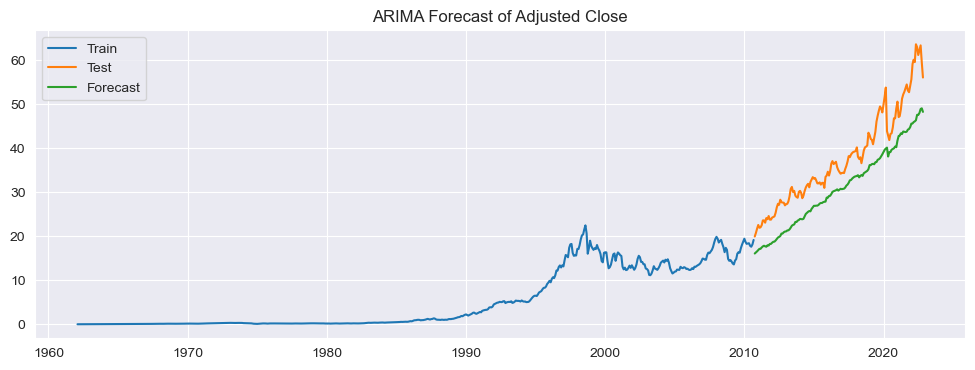

In [53]:
# Plot train, test, forecast
plt.figure(figsize=(12, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Forecast')
plt.legend(loc='best')
plt.title('ARIMA Forecast of Adjusted Close')
plt.show()

In [54]:
# Proper future forecast for next 6 months
n_steps = 6
forecast_diff = model_fit.forecast(steps=n_steps)


In [55]:
# Undo differencing
last_log_value = data_log.iloc[-1]
forecast_log = forecast_diff.cumsum() + last_log_value

In [56]:
# Convert back to original scale
forecast_real = np.expm1(forecast_log)

In [57]:
# Create future index
future_index = pd.date_range(start=monthly_data.index[-1] + pd.offsets.MonthEnd(1), periods=n_steps, freq='M')
forecast_real.index = future_index

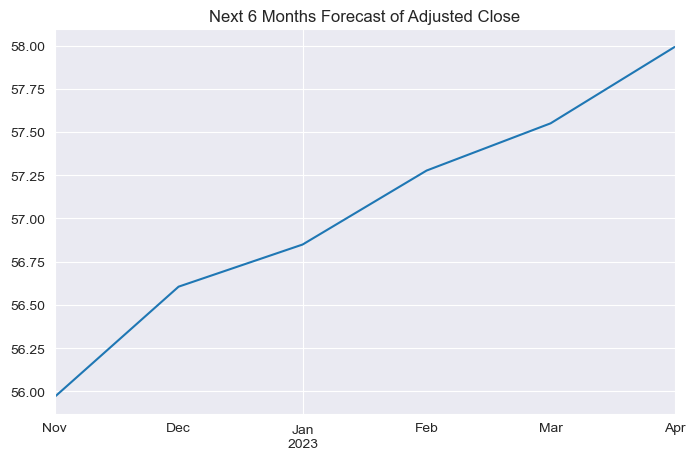

In [58]:
# Plot future forecast
plt.figure(figsize=(8, 5))
forecast_real.plot()
plt.title('Next 6 Months Forecast of Adjusted Close')
plt.show()